**SIMPLE LINEAR REGRESSION: ADVERTISING**

In the context of this dataset, we delve into the realm of advertising. A company has allocated its budget across various advertising channels, and the objective here is to gain insights into the performance of these channels concerning the revenue generated in their respective markets.

Our overarching aim is to construct a regression model that facilitates the prediction of sales. By harnessing this model, we intend to discern which marketing channels prove to be the most effective in driving sales and revenue. This analysis promises to shed light on the optimal allocation of advertising resources for maximum impact.

Approach:

1. step 1: Reading and understanding the data
2. step 2: Training the model
3. step 3: Residual Analysis
4. step 4: Prediction and evaluation on test set

##Step 1: Reading and understanding the

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as st
import sklearn as sk
#importing necessary libraries
Advertising = pd.read_csv("advertising.csv")
Advertising
#importing the data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
Advertising.shape

(200, 4)

In [ ]:
Advertising.info() # checking for null values and overall effieciency of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
Advertising.describe() #checking for statistical values

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Visualising the data**

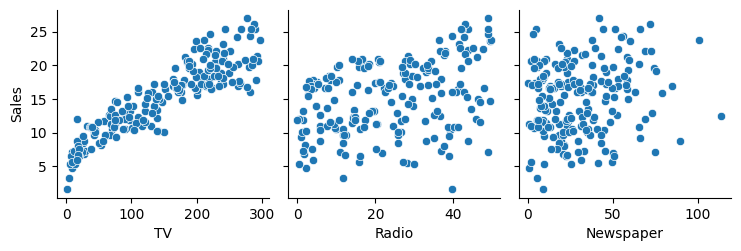

In [ ]:
sns.pairplot(data=Advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')#checking the linearity

**TV V/S Sales:**

1. Correlation: There is a high correlation between TV advertising and sales
2. Non-scattered values: Values are uniformly scattered
3. Steep slope: Steep slope representing a strong linear relation

**Radio V/S Sales:**
1. Correlation Difference: The correlation between radio advertising and sales is less pronounced compared to TV advertising, indicating a less direct relationship.
2. Scattered Values: When examining the correlation scatterplot, we observe that data points for radio advertising and sales are more dispersed along the y-axis, suggesting higher variability.
3. Less Steep Slope: The slope of the regression line for radio advertising is shallower than that of TV adverting.

**Newspaper V/S Sales:**
1. Correlation difference: The relationship between newspaper advertising and sales is even less linear compared to TV and radio advertising.
2. Increased Scattering: When analyzing the scatterplot, we notice that data points for newspaper advertising and sales are even more widely dispersed along the y-axis, indicating greater variability.
3. Reduced Slope: The slope of the regression line for newspaper advertising is less steep than those for TV and radio advertising, suggesting a weaker influence on sales.





##CORRELATION MATRIX

<Axes: >

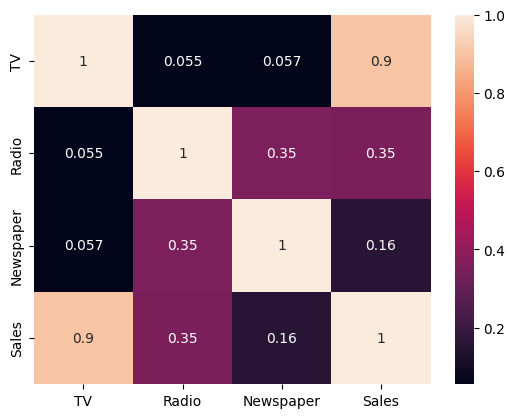

In [ ]:
sns.heatmap(Advertising.corr(),annot=True)

1. Purpose of the Correlation Matrix: This correlation matrix provides insights into the associations between the predictor variables and the target variable.

2. Interpreting Colors: In the matrix, lighter colors indicate a stronger positive correlation, while darker colors signify weaker or negative correlations.

3. High Correlation Observed: Notably, the correlation map highlights the robust positive relationship between TV advertising and sales, suggesting a significant impact.

4. Newspaper and Radio are comparitively less correlated to sales when compared to TV advertising.

5. Ambiguity in Relationships: Additionally, the correlation map reveals certain correlations between radio and newspaper that are subject to interpretation.

##Step 2: Training the model (TV)

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>



Approach:
1. Create 2 variables x,y
2. Create train and test sets from the avaiable data
3. Train the model on training set
4. Test the modeol on test set
5. For the purpose of this project we are taking single varibale TV and measuring its relation with advertising to validate the visulaized charts above


In [ ]:
X= Advertising['TV']
y= Advertising['Sales']

In [ ]:
from sklearn.model_selection import train_test_split #dividing the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
X_train_sm = st.add_constant(X_train) #adding a constant 'c' or the Beta not value since this is not added by default in statsmodels

In [ ]:
lr = st.OLS(y_train, X_train_sm).fit() #fitting the train set using Ordinary Least Square method

In [ ]:
lr.params #printing the slopes

const    6.948683
TV       0.054546
dtype: float64

**Inference:**
1. Equation: Sales=6.94 + 0.054(TV)
2. when money spent on TV advertising is increased by 1 unit, there is 0.54 times increase in sales.
3. For 0 money spend on TV advertising, sales = 6.94

In [ ]:
print(lr.summary()) #printing the results

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        05:17:26   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

1. R squared value is equal to 0.816 which means 81% of variance or change in sales is explained by TV advertising
2. The P-value is 0.000 showing the statistical significance and hence we reject the null hypothesis.
3. A lower Probablity of F statistic signifies that a high r squared value is not by chance and in statistically significant.

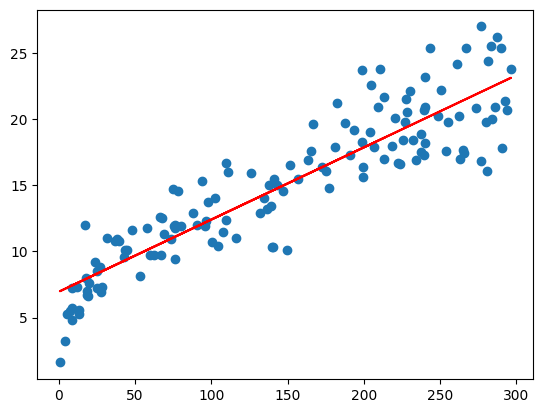

In [ ]:
y_train_pred = lr.predict(X_train_sm) #calculating the predicted values of y train
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred,'r')
plt.show() #checking the actual x_train and y_train values with the linear regression equation

1.The red line represents the linear regression model with the equation y = 6.948 + 0.054x, where 'y' stands for sales, and 'x' represents TV advertising expenses.

2.The scattered blue data points correspond to the actual values of 'x' (money spent on TV advertising) and 'y' (sales) in the dataset.

##Step 3: Residual Analysis (TV)

1. One of the assumptions of linear regression is that the error terms should follow a normal distribution with a mean of zero. After constructing the model, it's essential to assess whether this assumption holds. We can achieve this by plotting a histogram of the error terms to determine their distribution.
2. Another critical assumption is the independence of error terms. To validate this assumption, it's necessary to plot the error terms against either the predictor variable 'X' or the response variable 'Y' to detect any discernible patterns or dependencies.

In [ ]:
res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

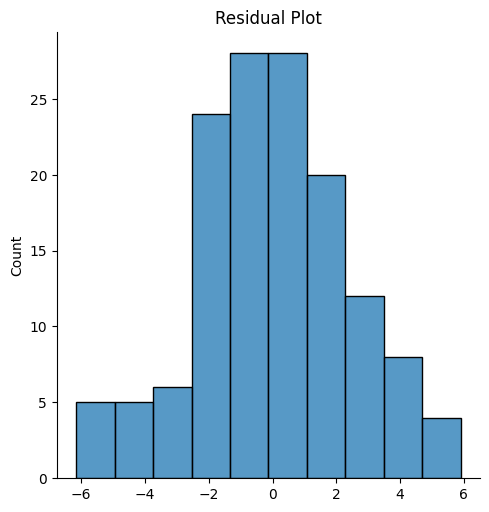

In [ ]:
plt.figure()
sns.displot(res)
plt.title('Residual Plot') #plotting a istogram for all the residuals to check if the residuals are normally distributed


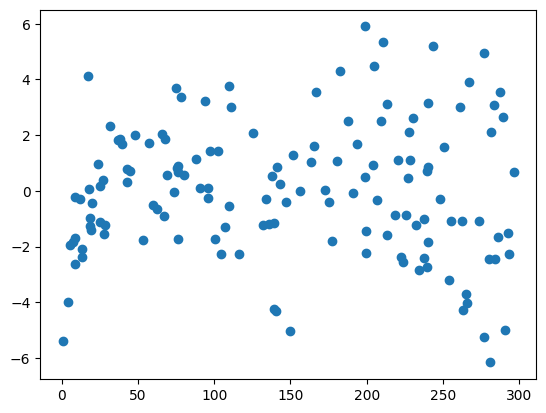

In [ ]:
plt.scatter(X_train,res) #checking for any pattern in the residuals.

1. In the above histogram it is evident that the residual errors exhibit a normal distribution, with a central point at 0.0.
2. We should make sure that there are no noticeable patterns when we look at how the leftover errors are spread out in relation to the thing we're trying to predict. The scatter plot above confirms this. (except for the fact that the variance seems to be increasing a little for the higher values).

##Step 4: Prediction and evaluation on test set (TV)

In [ ]:
X_pred = st.add_constant(X_test) #adding a constant to the training set since statsmodel does not add it by default



In [ ]:
y_pred = lr.predict(X_pred) #predicting results on y_test data set to see the ft of the model

In [ ]:
y_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2=r2_score(y_true= y_test, y_pred= y_pred) #calculating r2 on the test set to check the fit
r2

0.792103160124566

In [ ]:
r2_score(y_true= y_train, y_pred= y_train_pred) #calculating r2 on the train set to evaluate the difference between test and train set

0.8157933136480389

In [ ]:
mean_squared_error(y_true= y_test, y_pred= y_pred) #mean_squared_error on test set

4.077556371826953

In [ ]:
mean_squared_error(y_true= y_train, y_pred= y_train_pred)

5.752400386486836

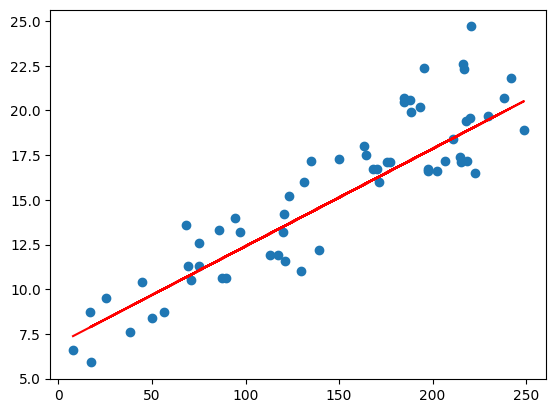

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred,'r')
plt.show() #checking the actual x_test and y_test values with the linear regression equation

##CONCLUSION ON TV ADVERTISING:
1. Based on the test results presented above, it becomes evident that the model exhibits a high level of explanatory power, performs well on previously unseen data, and possesses strong interpretive capabilities.
2. It is apparent that a favorable correlation exists between the investment in TV advertising expenditure and sales outcomes.
3. Specifically, when the expenditure on TV advertising increases by one unit, it results in a 0.54-fold increase in sales, as revealed by the model's coefficients.

##RADIO:

In [ ]:
X= Advertising['Radio']
y= Advertising['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100) #train test split
X_train_sm = st.add_constant(X_train) #adding a constant 'c'
lr = st.OLS(y_train, X_train_sm).fit() #fitting the train set using Ordinary Least Square method
lr.params
print(lr.summary()) #printing the results

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.36e-05
Time:                        05:17:27   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.0

LEARNINGS:
1. While the probability of the F-statistic being 0.0000536 suggests a good overall model fit, it's important to withhold judgment on whether this is the best model until all linear regression assumptions are satisfied.
2. The coefficients and constants exhibit p-values below 0.005, indicating their statistical significance.
3. Nevertheless, the notably low R-squared value indicates that the model does not effectively explain the variance in the coefficients.

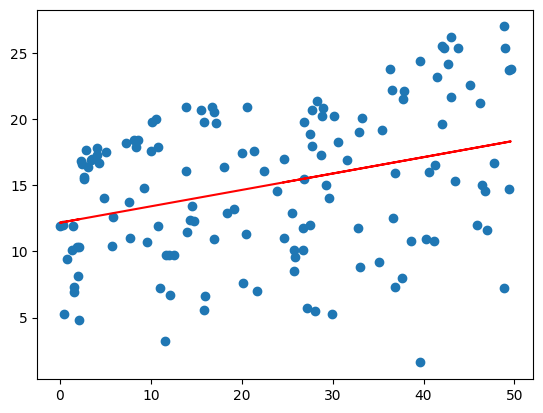

In [ ]:
y_train_pred = lr.predict(X_train_sm) #calculating the predicted values of y train
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred,'r')
plt.show() #checking the actual x_train and y_train values with the linear regression equation

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

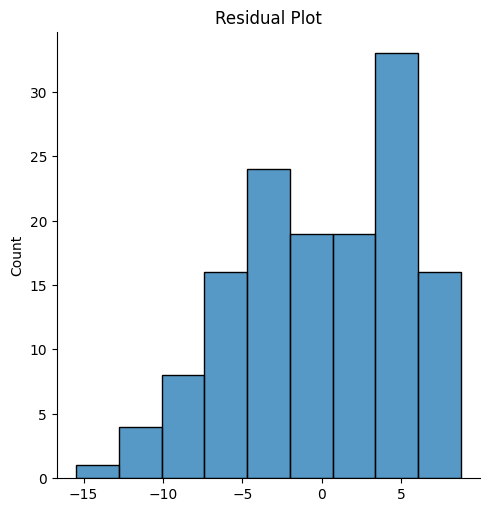

In [ ]:
res = y_train - y_train_pred
plt.figure()
sns.displot(res)
plt.title('Residual Plot') #plotting a istogram for all the residuals to check if the residuals are normally distributed


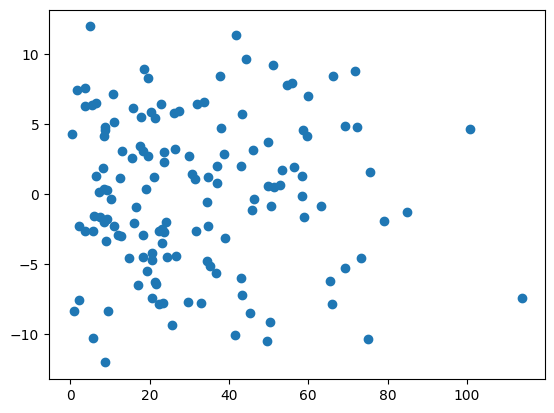

In [ ]:
plt.scatter(X_train,res)

LEARNINGS:
1. It's evident that the linear regression line lacks precision in predicting actual values, resulting in a dispersion of actual values away from the regression line.
2. While the error terms do not exhibit a normal distribution, their scattering does not follow a discernible pattern.
3. This leads to the conclusion that the radio variable does not exert a significant influence on sales.

##NEWSPAPER

In [ ]:
X= Advertising['Newspaper']
y= Advertising['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100) #train test split
X_train_sm = st.add_constant(X_train) #adding a constant 'c'
lr = st.OLS(y_train, X_train_sm).fit() #fitting the train set using Ordinary Least Square method
lr.params
print(lr.summary()) #printing the results

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.461
Date:                Mon, 09 Oct 2023   Prob (F-statistic):            0.00423
Time:                        05:17:27   Log-Likelihood:                -435.38
No. Observations:                 140   AIC:                             874.8
Df Residuals:                     138   BIC:                             880.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1327      0.792     16.574      0.0

LEARNINGS:
1. While the probability of the F-statistic being 0.00423 suggests a good overall model fit, it's important to withhold judgment on whether this is the best model until all linear regression assumptions are satisfied.
2. The coefficients and constants exhibit p-values below 0.05, indicating their statistical significance.
3. Nevertheless, the notably low R-squared value indicates that the model does not effectively explain the variance in the coefficients.

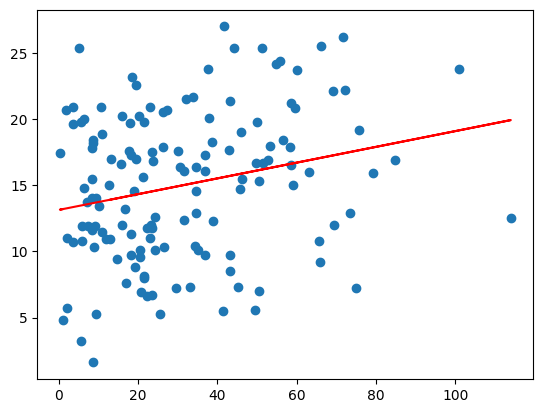

In [ ]:
y_train_pred = lr.predict(X_train_sm) #calculating the predicted values of y train
plt.scatter(X_train,y_train)
plt.plot(X_train, y_train_pred,'r')
plt.show() #checking the actual x_train and y_train values with the linear regression equation

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

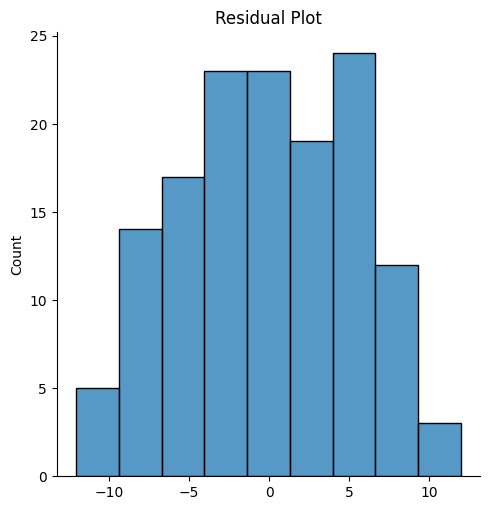

In [ ]:
res = y_train - y_train_pred
plt.figure()
sns.displot(res)
plt.title('Residual Plot') #plotting a istogram for all the residuals to check if the residuals are normally distributed


LEARNINGS:
1. The linear regression line exhibits imprecise predictions of actual values, showcasing a notable dispersion between the regression line and the observed values.
2. The error terms do not follow a normal distribution, and their dispersion lacks a distinct pattern.
3.In summary, it can be inferred that radio advertising does not exert a significant influence on sales.